# **House Price Prediction**
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.


The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.



**The company wants to know:**



> Which variables are significant in predicting the price of a house


> How well those variables describe the price of a house.





## **Business Goal**
You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

**Importing Python Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import statsmodels
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

**Reading & Understaning the data**

In [2]:
house_df = pd.read_csv('/content/drive/MyDrive/UpGrad/Graded /Assignement/House Price Prediction/train.csv')

In [3]:
house_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
house_df.shape

(1460, 81)

In [5]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

**Handling Missing Data**

In [6]:
missing_values = round(house_df.isnull().mean()*100,2)
missing_values[missing_values>0]

LotFrontage     17.74
Alley           93.77
MasVnrType       0.55
MasVnrArea       0.55
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinType2     2.60
Electrical       0.07
FireplaceQu     47.26
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
PoolQC          99.52
Fence           80.75
MiscFeature     96.30
dtype: float64

In [7]:
# Drop the column which have more percentage of missing values i.e greater than 20%
remove_col_list = ['Alley','FireplaceQu','PoolQC','Fence','MiscFeature']
house_df = house_df.drop(remove_col_list, axis = 1)

In [8]:
# Drop Id column as its of no use
house_df = house_df.drop('Id', axis = 1)

In [9]:
missing_values = round(house_df.isnull().mean()*100,2)
missing_values[missing_values>0]

LotFrontage     17.74
MasVnrType       0.55
MasVnrArea       0.55
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinType2     2.60
Electrical       0.07
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
dtype: float64

In [10]:
# Handle Missing value for the rest column
missing_column = ['LotFrontage','MasVnrType','MasVnrArea','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Electrical', 'GarageType' ,'GarageYrBlt', 'GarageFinish', 'GarageQual','GarageCond' ]

In [11]:
house_df[missing_column].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1201 non-null   float64
 1   MasVnrType    1452 non-null   object 
 2   MasVnrArea    1452 non-null   float64
 3   BsmtQual      1423 non-null   object 
 4   BsmtCond      1423 non-null   object 
 5   BsmtExposure  1422 non-null   object 
 6   BsmtFinType1  1423 non-null   object 
 7   BsmtFinType2  1422 non-null   object 
 8   Electrical    1459 non-null   object 
 9   GarageType    1379 non-null   object 
 10  GarageYrBlt   1379 non-null   float64
 11  GarageFinish  1379 non-null   object 
 12  GarageQual    1379 non-null   object 
 13  GarageCond    1379 non-null   object 
dtypes: float64(3), object(11)
memory usage: 159.8+ KB


In [12]:
house_df[missing_column].describe()

,LotFrontage,MasVnrArea,GarageYrBlt
count,1201.000000,1452.000000,1379.000000
mean,70.049958,103.685262,1978.506164
std,24.284752,181.066207,24.689725
min,21.000000,0.000000,1900.000000
25%,59.000000,0.000000,1961.000000
50%,69.000000,0.000000,1980.000000
75%,80.000000,166.000000,2002.000000
max,313.000000,1600.000000,2010.000000


In [13]:
# fill missing value with mean or median for numerial column after carefull analysis

house_df['LotFrontage']= house_df['LotFrontage'].fillna(house_df['LotFrontage'].mean())
house_df['GarageYrBlt']= house_df['GarageYrBlt'].fillna(house_df['GarageYrBlt'].mean())
house_df['MasVnrArea']= house_df['MasVnrArea'].fillna(house_df['MasVnrArea'].median())

In [14]:
# fill missing categorical column value with mode after carefull analysis

missing_categorical_column = ['MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Electrical', 'GarageType', 'GarageFinish', 'GarageQual','GarageCond' ]

house_df[missing_categorical_column].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MasVnrType    1452 non-null   object
 1   BsmtQual      1423 non-null   object
 2   BsmtCond      1423 non-null   object
 3   BsmtExposure  1422 non-null   object
 4   BsmtFinType1  1423 non-null   object
 5   BsmtFinType2  1422 non-null   object
 6   Electrical    1459 non-null   object
 7   GarageType    1379 non-null   object
 8   GarageFinish  1379 non-null   object
 9   GarageQual    1379 non-null   object
 10  GarageCond    1379 non-null   object
dtypes: object(11)
memory usage: 125.6+ KB


In [15]:
[house_df[i].value_counts() for i in missing_categorical_column]

[None       864
 BrkFace    445
 Stone      128
 BrkCmn      15
 Name: MasVnrType, dtype: int64,
 TA    649
 Gd    618
 Ex    121
 Fa     35
 Name: BsmtQual, dtype: int64,
 TA    1311
 Gd      65
 Fa      45
 Po       2
 Name: BsmtCond, dtype: int64,
 No    953
 Av    221
 Gd    134
 Mn    114
 Name: BsmtExposure, dtype: int64,
 Unf    430
 GLQ    418
 ALQ    220
 BLQ    148
 Rec    133
 LwQ     74
 Name: BsmtFinType1, dtype: int64,
 Unf    1256
 Rec      54
 LwQ      46
 BLQ      33
 ALQ      19
 GLQ      14
 Name: BsmtFinType2, dtype: int64,
 SBrkr    1334
 FuseA      94
 FuseF      27
 FuseP       3
 Mix         1
 Name: Electrical, dtype: int64,
 Attchd     870
 Detchd     387
 BuiltIn     88
 Basment     19
 CarPort      9
 2Types       6
 Name: GarageType, dtype: int64,
 Unf    605
 RFn    422
 Fin    352
 Name: GarageFinish, dtype: int64,
 TA    1311
 Fa      48
 Gd      14
 Ex       3
 Po       3
 Name: GarageQual, dtype: int64,
 TA    1326
 Fa      35
 Gd       9
 Po       7
 

In [16]:
for i in missing_categorical_column:
  house_df[i] = house_df[i].fillna(house_df[i].mode()[0])

In [17]:
# Checking if any missing value exist in the dataframe
missing_values = round(house_df.isnull().mean()*100,2)
missing_values[missing_values>0]

Series([], dtype: float64)

**Handle Outliers**

In [18]:
house_df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,22.024023,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,70.049958,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [19]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

<Axes: xlabel='SalePrice', ylabel='Density'>

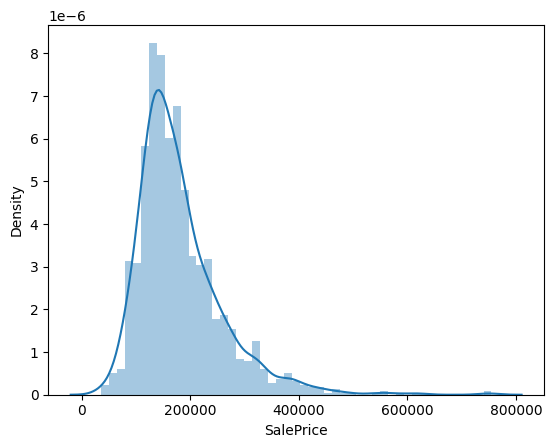

In [20]:
sns.distplot(house_df['SalePrice'])

In [21]:
num_col = house_df.select_dtypes(include = ['int', 'float'])

In [22]:
len(num_col.columns)

37

In [23]:
num_col_list = list(num_col.columns)

In [24]:
# Using IQR technique to remove the outliers from the numerical column

Q1 = house_df[num_col_list].quantile(0.05)
Q3 = house_df[num_col_list].quantile(0.95)
IQR = Q3 - Q1
house_df = house_df[~((house_df[num_col_list] < (Q1 - 1.5 * IQR)) |(house_df[num_col_list] > (Q3 + 1.5 * IQR))).any(axis=1)]

<Axes: xlabel='SalePrice', ylabel='Density'>

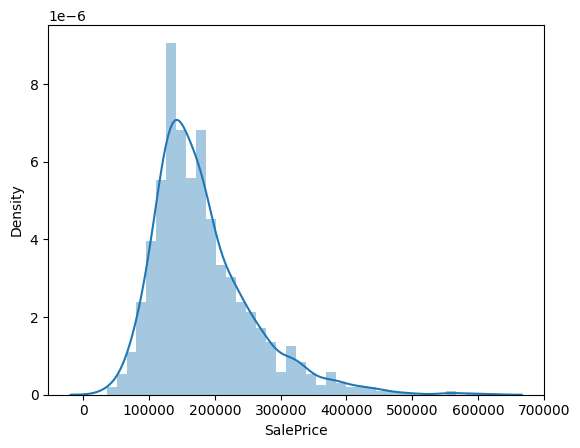

In [25]:
# Checking sales distribution plot

sns.distplot(house_df['SalePrice'])

In [26]:
house_df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1266.000000,1266.000000,1266.000000,1266.000000,1266.000000,1266.000000,1266.000000,1266.000000,1266.000000,1266.000000,...,1266.000000,1266.000000,1266.000000,1266.0,1266.000000,1266.0,1266.0,1266.000000,1266.000000,1266.000000
mean,54.522117,69.266304,9640.176935,6.155608,5.567930,1973.480253,1985.822275,103.954186,441.757504,40.281201,...,93.585308,45.843602,21.109795,0.0,14.796998,0.0,0.0,6.293049,2007.804107,181610.662717
std,40.663333,19.980090,4133.746732,1.364816,1.082618,29.436365,20.624538,173.174685,428.430328,137.986440,...,120.249869,60.675897,59.192870,0.0,53.234175,0.0,0.0,2.694788,1.322179,75827.202320
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,1.000000,2006.000000,35311.000000
25%,20.000000,60.000000,7500.000000,5.000000,5.000000,1955.000000,1968.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,5.000000,2007.000000,131000.000000
50%,50.000000,70.049958,9356.500000,6.000000,5.000000,1976.000000,1995.000000,0.000000,387.500000,0.000000,...,0.000000,27.000000,0.000000,0.0,0.000000,0.0,0.0,6.000000,2008.000000,165000.000000
75%,60.000000,78.750000,11433.250000,7.000000,6.000000,2002.000000,2004.000000,168.750000,719.000000,0.000000,...,168.000000,68.000000,0.000000,0.0,0.000000,0.0,0.0,8.000000,2009.000000,215000.000000
max,190.000000,182.000000,36500.000000,10.000000,9.000000,2010.000000,2010.000000,1129.000000,2188.000000,972.000000,...,736.000000,364.000000,386.000000,0.0,396.000000,0.0,0.0,12.000000,2010.000000,611657.000000


# **Data Visualization**

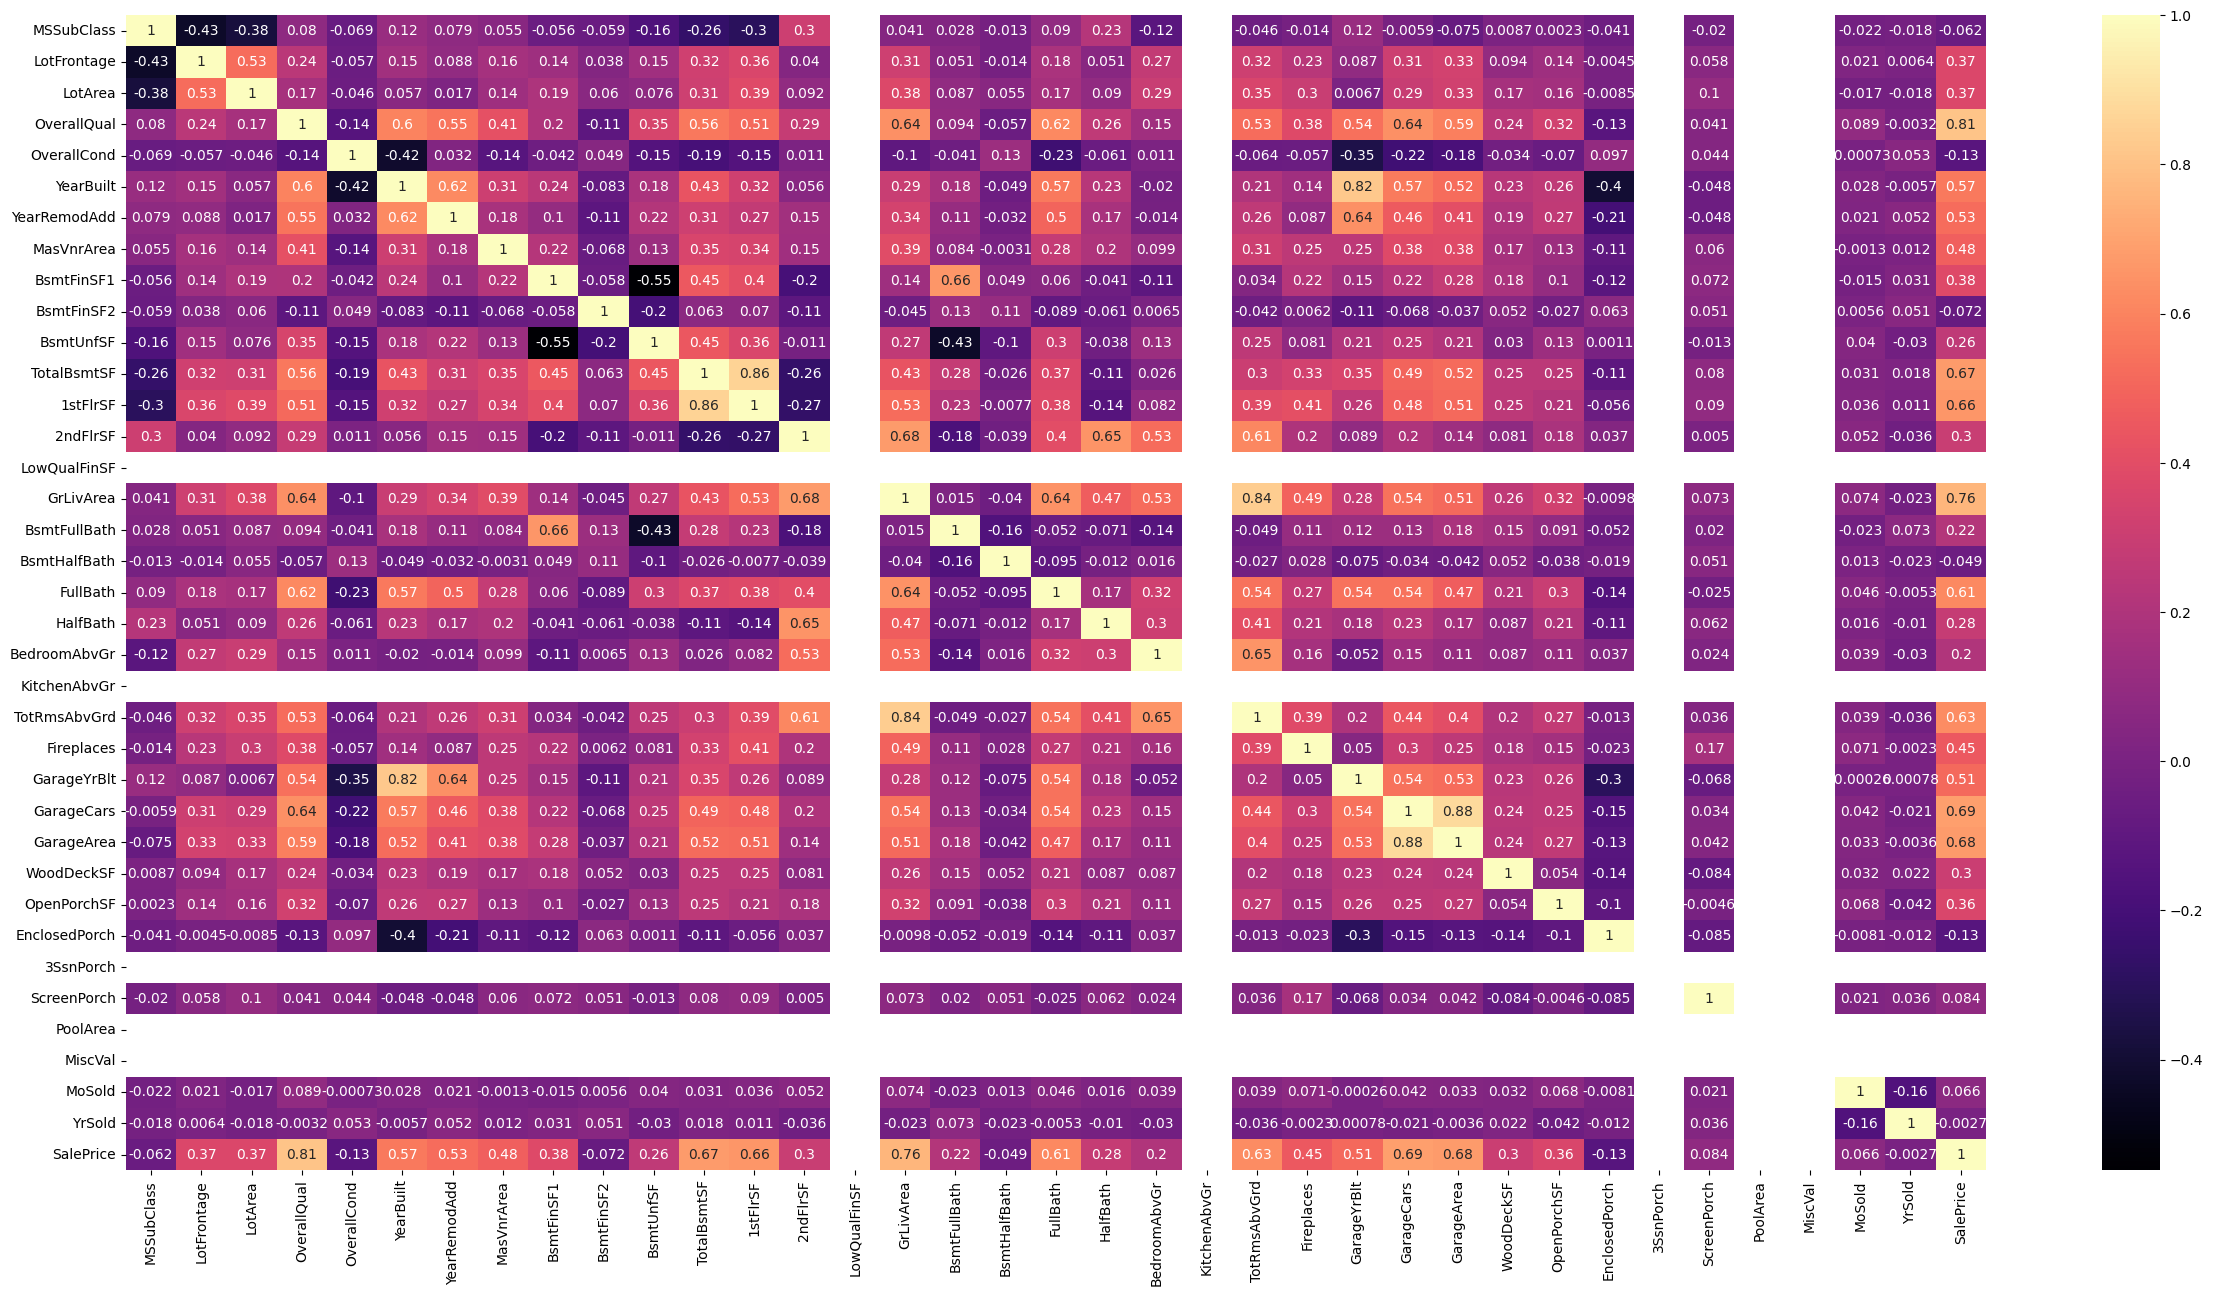

In [27]:
plt.figure(figsize = (30, 15))
sns.heatmap(house_df.corr(), annot = True, cmap="magma")
plt.show()

In [28]:
# Remove the highly correlated variables

house_df.drop(['EnclosedPorch', 'GarageYrBlt', 'BsmtFullBath','BsmtUnfSF', 'MSSubClass','2ndFlrSF'], axis = 1, inplace = True)

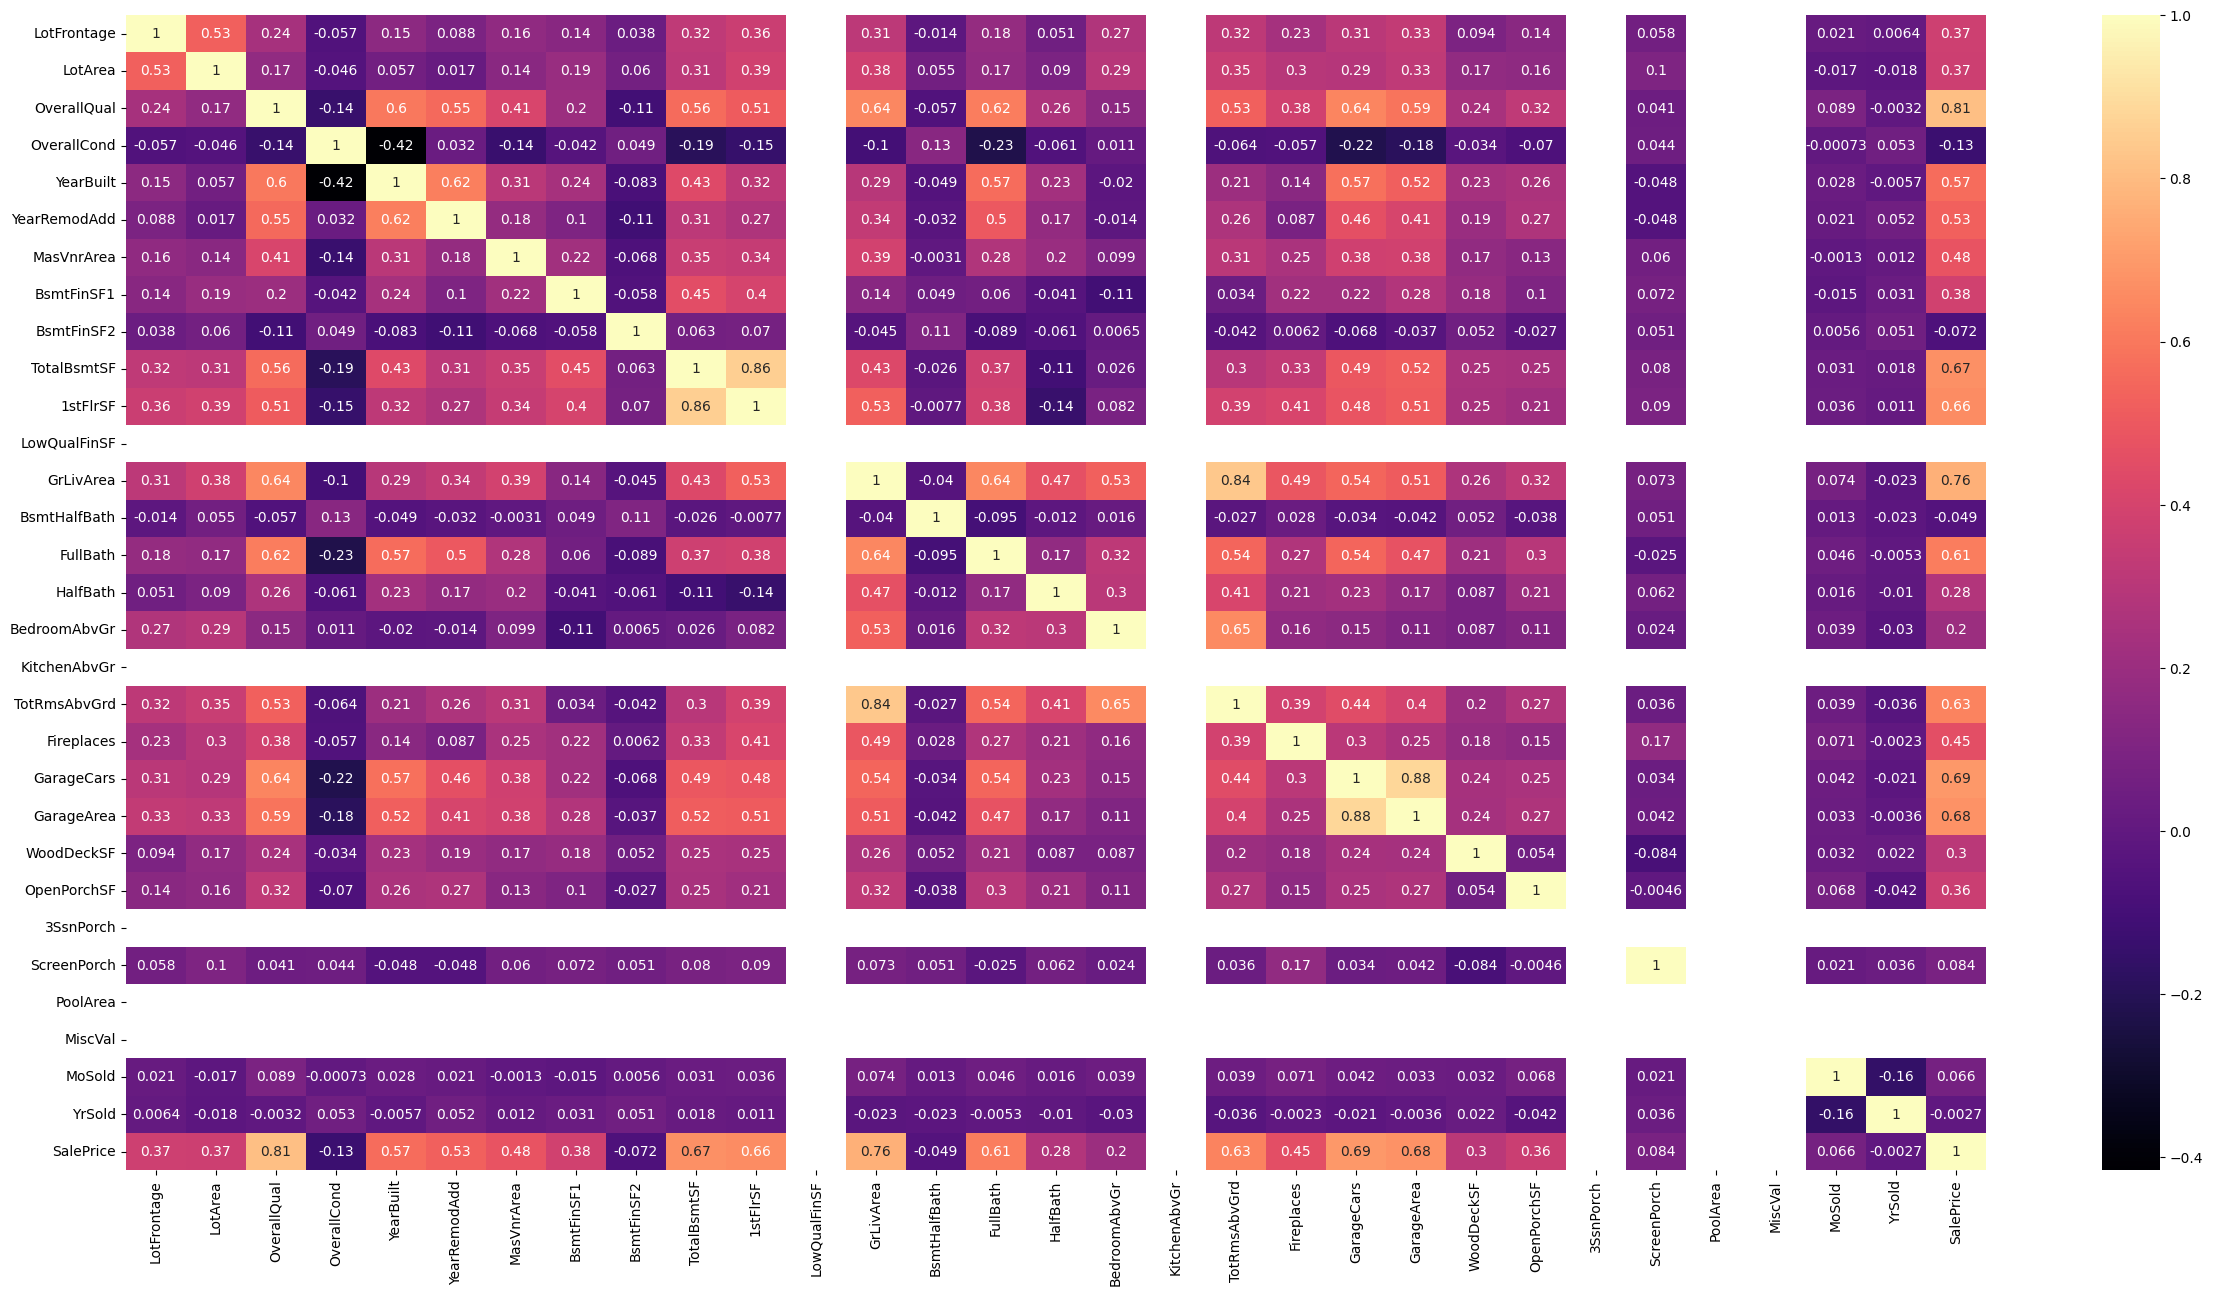

In [29]:
plt.figure(figsize = (30, 15))
sns.heatmap(house_df.corr(), annot = True, cmap="magma")
plt.show()

In [30]:
#Ploting the graph for all categorical variables

cat_col = house_df.select_dtypes(include = ['object'])

In [31]:
cat_col.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

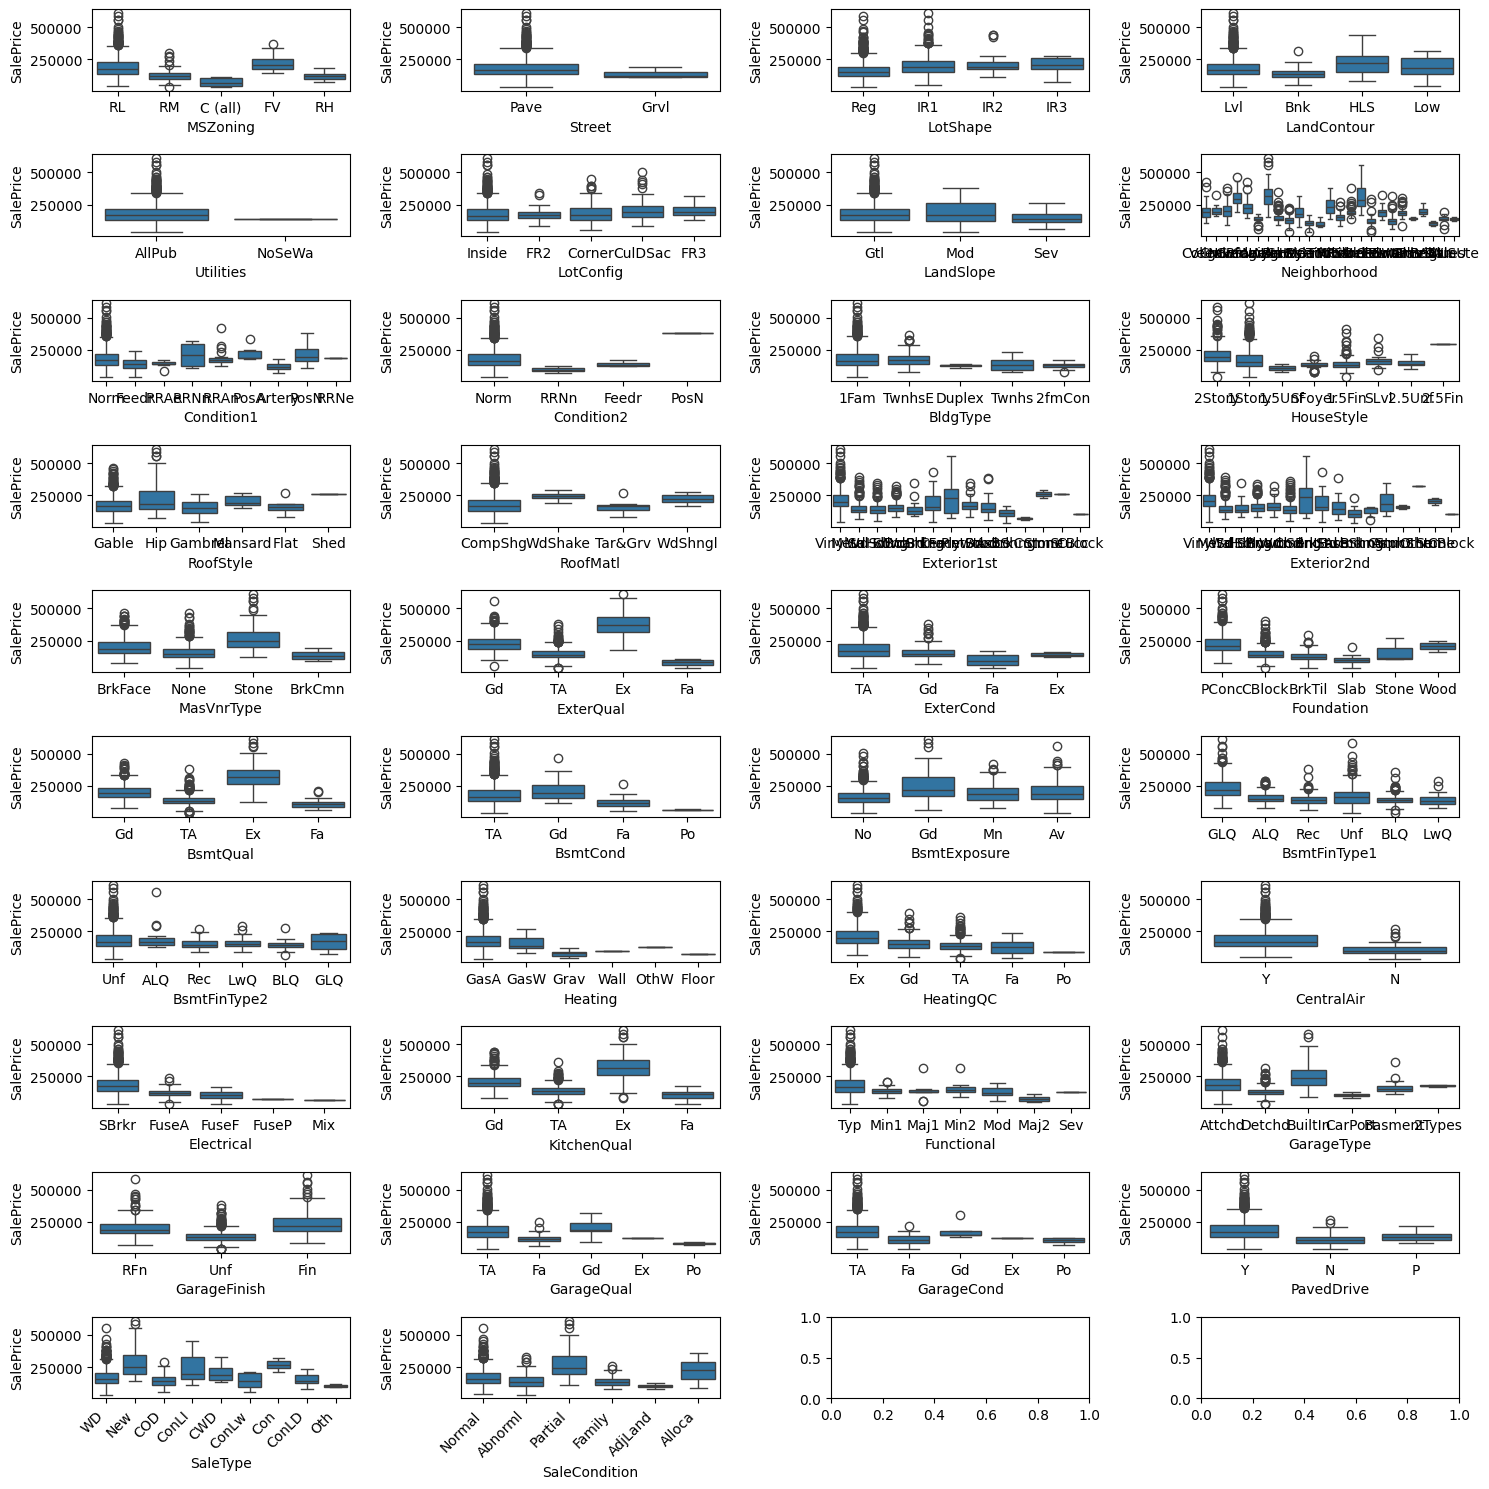

In [32]:
# Define the number of columns and rows
ncols = 4
nrows = 10

# Create the figure and subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 15))

for i, col in enumerate(cat_col.columns):
    ax = axes[i // ncols][i % ncols]
    sns.boxplot(x=col, y="SalePrice", data=house_df, ax=ax)

    # Rotate the x-axis labels if necessary
    if i >= ncols * (nrows - 1):
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


plt.tight_layout()
plt.show()


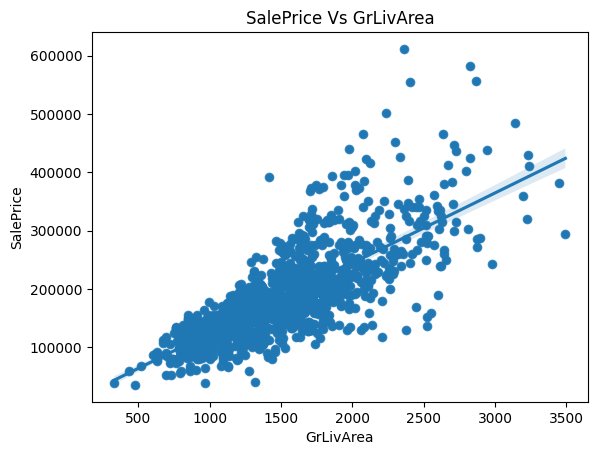

In [33]:
# Scatter plot of SalePrice vs. GrLivArea
sns.scatterplot(x="GrLivArea", y="SalePrice", data=house_df)
plt.title("SalePrice Vs GrLivArea")
sns.regplot(x="GrLivArea", y="SalePrice", data=house_df)
plt.show()

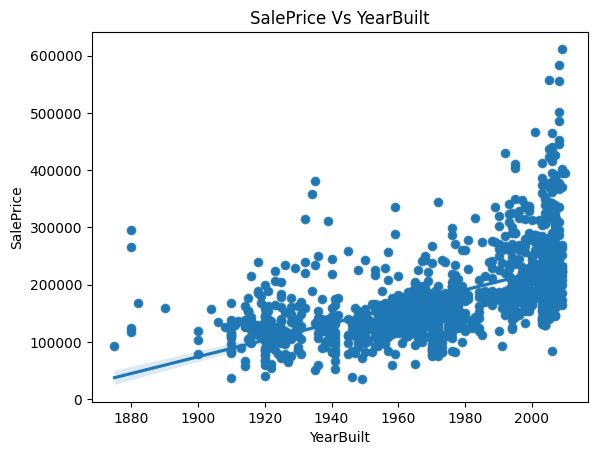

In [34]:
# SalePrice Vs YearBuilt
sns.scatterplot(x="YearBuilt", y="SalePrice", data=house_df)
plt.title("SalePrice Vs YearBuilt")
sns.regplot(x="YearBuilt", y="SalePrice", data=house_df)
plt.show()

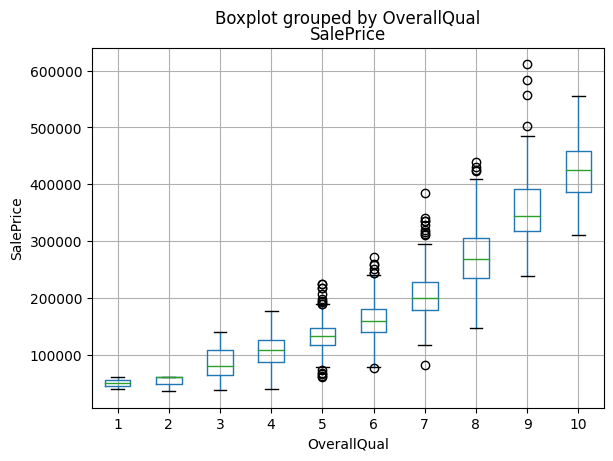

In [35]:
# Create a boxplot of SalePrice by OverallQual
house_df.boxplot('SalePrice', by='OverallQual')
plt.ylabel('SalePrice')
plt.show()

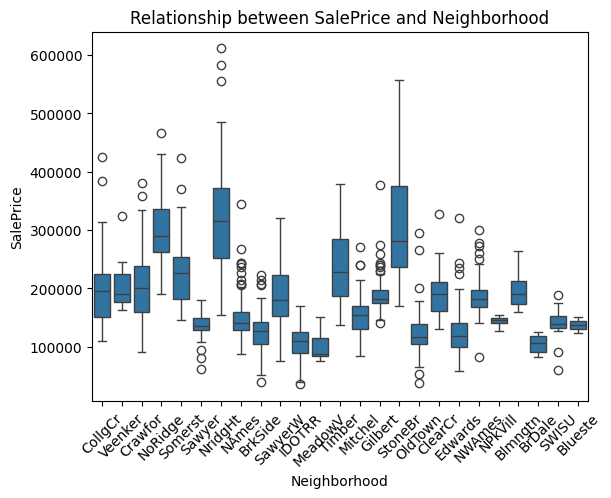

In [36]:
# Plot the relationship between SalePrice and Neighborhood
sns.boxplot(x="Neighborhood", y="SalePrice", data=house_df)
plt.title("Relationship between SalePrice and Neighborhood")
plt.xticks(rotation=45)
plt.show()


**Creating Dummy Column**

In [37]:
cat_col = ['LandSlope','ExterQual','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
            'HeatingQC','CentralAir',  'KitchenQual','GarageFinish','GarageQual','GarageCond',
             'ExterCond','LotShape']

In [38]:
# Convert categorical variable to numeric

house_df[cat_col[0]] = house_df[cat_col[0]].map({'Gtl':0,'Mod':1,'Sev':2})
house_df[cat_col[1]] = house_df[cat_col[1]].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
house_df[cat_col[2]] = house_df[cat_col[2]].map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
house_df[cat_col[3]] = house_df[cat_col[3]].map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
house_df[cat_col[4]] = house_df[cat_col[4]].map({'NA':0,'No':1,'Mn':2,'Av':3,'Gd':4})
house_df[cat_col[5]] = house_df[cat_col[5]].map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
house_df[cat_col[6]] = house_df[cat_col[6]].map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
house_df[cat_col[7]] = house_df[cat_col[7]].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
house_df[cat_col[8]] = house_df[cat_col[8]].map({'N':0,'Y':1})
house_df[cat_col[9]] = house_df[cat_col[9]].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
house_df[cat_col[10]]= house_df[cat_col[10]].map({'NA':0,'Unf':1,'RFn':2,'Fin':3})
house_df[cat_col[11]] = house_df[cat_col[11]].map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
house_df[cat_col[12]] = house_df[cat_col[12]].map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
house_df[cat_col[13]] = house_df[cat_col[13]].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
house_df[cat_col[14]] = house_df[cat_col[14]].map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})

In [39]:
dummy_col = pd.get_dummies(house_df[['MSZoning','LandContour','LotConfig','Neighborhood','Condition1','Condition2','BldgType',
             'HouseStyle','RoofStyle','RoofMatl','Exterior1st',  'Exterior2nd','MasVnrType','Foundation',
             'Heating','Electrical','Functional','GarageType','PavedDrive','SaleType','SaleCondition','Street','Utilities']],
                           drop_first=True)

house_df = pd.concat([house_df,dummy_col],axis='columns')

house_df = house_df.drop(['MSZoning','LandContour','LotConfig','Neighborhood','Condition1','Condition2','BldgType',
             'HouseStyle','RoofStyle','RoofMatl','Exterior1st',  'Exterior2nd','MasVnrType','Foundation',
             'Heating','Electrical','Functional','GarageType','PavedDrive','SaleType','SaleCondition','Street','Utilities'],axis='columns')

In [40]:
house_df.shape

(1266, 184)

**Spliting the dataset into train and test in 70:30 ratio**

In [41]:
df_train,df_test = train_test_split(house_df,train_size=0.7,test_size=0.3,random_state=50)

In [42]:
num_col = house_df.select_dtypes(include = ['float64','int64'])

**Scalling the numerical column using StandardScaler**

In [43]:
numerical_columns = list(num_col.columns)

# intializing the class
scaler = StandardScaler()
df_train[numerical_columns] = scaler.fit_transform(df_train[numerical_columns])
df_test[numerical_columns] = scaler.transform(df_test[numerical_columns])

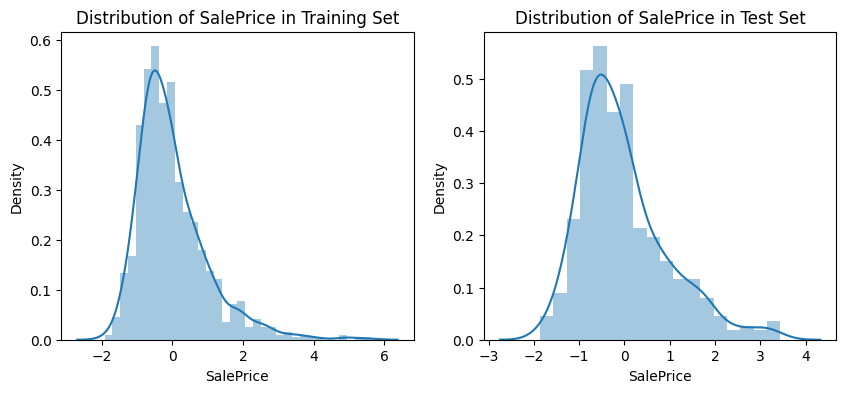

In [44]:
# Checking the distribution of train and test dataset
plt.figure(figsize=(10,4))
plt.subplot(121)
sns.distplot(df_train.SalePrice)
plt.title('Distribution of SalePrice in Training Set')

plt.subplot(122)
sns.distplot(df_test.SalePrice)
plt.title('Distribution of SalePrice in Test Set')

plt.show()

**Extracting the target column from the predictive columns**

In [45]:
y_train = df_train.pop('SalePrice')
X_train = df_train

In [46]:
y_test = df_test.pop('SalePrice')
X_test = df_test

**RFE for Feature Elimination :** Remove unwanted column from the dataset automatically


In [47]:
print("X_train shape: ",X_train.shape)
print("y_train shape: ",y_train.shape)

X_train shape:  (886, 183)
y_train shape:  (886,)


In [48]:
# Running RFE to select top 50 features

lm  = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm, n_features_to_select=50)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=50)

In [49]:
rfe_scores = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)))
rfe_scores.columns = ['Column_Names','Status','Rank']

In [50]:
# Shocasing features along with their respective rank

rfe_scores.sort_values(by='Rank')

,Column_Names,Status,Rank
86,Condition1_RRNe,True,1
144,Foundation_Stone,True,1
92,BldgType_Duplex,True,1
90,Condition2_RRNn,True,1
133,Exterior2nd_Stone,True,1
...,...,...,...
32,GarageFinish,False,130
74,Neighborhood_Sawyer,False,131
58,Neighborhood_BrkSide,False,132
174,SaleType_Oth,False,133


In [51]:
# RFE selected features

rfe_sel_columns = list(rfe_scores[rfe_scores.Status==True].Column_Names)
rfe_sel_columns

['OverallQual',
 'BsmtFinSF1',
 'TotalBsmtSF',
 'LowQualFinSF',
 'GrLivArea',
 'MiscVal',
 'Neighborhood_NPkVill',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_SWISU',
 'Neighborhood_Somerst',
 'Neighborhood_StoneBr',
 'Condition1_RRNe',
 'Condition1_RRNn',
 'Condition2_Norm',
 'Condition2_RRNn',
 'BldgType_Duplex',
 'BldgType_Twnhs',
 'BldgType_TwnhsE',
 'HouseStyle_2.5Unf',
 'RoofStyle_Gable',
 'RoofStyle_Gambrel',
 'RoofStyle_Hip',
 'RoofStyle_Mansard',
 'RoofStyle_Shed',
 'RoofMatl_Tar&Grv',
 'Exterior1st_BrkComm',
 'Exterior1st_CBlock',
 'Exterior1st_Stone',
 'Exterior1st_VinylSd',
 'Exterior2nd_Brk Cmn',
 'Exterior2nd_CBlock',
 'Exterior2nd_Stone',
 'Exterior2nd_VinylSd',
 'Foundation_Slab',
 'Foundation_Stone',
 'Foundation_Wood',
 'Heating_GasA',
 'Heating_GasW',
 'Heating_Grav',
 'Functional_Maj2',
 'Functional_Min1',
 'Functional_Mod',
 'Functional_Sev',
 'GarageType_BuiltIn',
 'SaleType_CWD',
 'SaleType_Con',
 'SaleType_ConLI',
 'SaleType_New',
 'SaleCond

**Using RFE selected columns for building the model**

In [52]:
X_train = X_train[rfe_sel_columns]
X_test = X_test[rfe_sel_columns]

**Model 1: Built using OLS**

In [53]:
X_train_const = sm.add_constant(X_train)

lr=sm.OLS(y_train,X_train_const)
lr_model=lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     157.1
Date:                Mon, 25 Mar 2024   Prob (F-statistic):               0.00
Time:                        10:57:29   Log-Likelihood:                -263.83
No. Observations:                 886   AIC:                             619.7
Df Residuals:                     840   BIC:                             839.9
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1966      0.274     -0.716      0.474      -0.735       0.342
OverallQual              0.2849      0.020     14.583      0.000       0.247       0.323
BsmtFinSF1               0.1913      0.013     14.242      0.000       0.165       0.218
TotalBsmtSF              0.1707      0.018      9.748      0.000       0.136       0.205
LowQualFinSF         -4.352e-16   3.99e-16     -1.092      0.275   -1.22e-15    3.47e-16
GrLivArea                0.3497      0.018     19.663      0.000       0.315       0.385
MiscVal               5.135e-16   4.36e-16      1.178      0.239   -3.42e-16    1.37e-15
Neighborhood_NPkVill     0.0048      0.141      0.034      0.973      -0.272       0.282
Neighborhood_NoRidge     0.3227      0.079      4.073      0.000       0.167       0.478
Neighborhood_NridgHt     0.5244      0.058      9.016      0.000       0.410       0.639
Neighborhood_SWISU      -0.2633      0.108     -2.448      0.015      -0.474      -0.052
Neighborhood_Somerst     0.2676      0.052      5.124      0.000       0.165       0.370
Neighborhood_StoneBr     0.6411      0.086      7.471      0.000       0.473       0.810
Condition1_RRNe          0.1604      0.336      0.478      0.633      -0.498       0.819
Condition1_RRNn          0.5162      0.216      2.394      0.017       0.093       0.939
Condition2_Norm          0.4207      0.179      2.355      0.019       0.070       0.771
Condition2_RRNn          0.7141      0.298      2.400      0.017       0.130       1.298
BldgType_Duplex         -0.1770      0.143     -1.235      0.217      -0.458       0.104
BldgType_Twnhs          -0.2718      0.065     -4.197      0.000      -0.399      -0.145
BldgType_TwnhsE         -0.1813      0.042     -4.309      0.000      -0.264      -0.099
HouseStyle_2.5Unf       -0.2246      0.153     -1.470      0.142      -0.524       0.075
RoofStyle_Gable         -0.0725      0.081     -0.900      0.368      -0.231       0.086
RoofStyle_Gambrel       -0.1972      0.135     -1.456      0.146      -0.463       0.069
RoofStyle_Hip            0.0151      0.082      0.185      0.853      -0.145       0.176
RoofStyle_Mansard       -0.0310      0.171     -0.182      0.856      -0.366       0.304
RoofStyle_Shed           0.3992      0.295      1.355      0.176      -0.179       0.977
RoofMatl_Tar&Grv        -0.3102      0.199     -1.559      0.119      -0.701       0.080
Exterior1st_BrkComm      0.0967      0.196      0.492      0.623      -0.289       0.482
Exterior1st_CBlock      -0.0963      0.168     -0.573      0.567      -0.426       0.233
Exterior1st_Stone       -0.5692      0.339     -1.678      0.094      -1.235       0.097
Exterior1st_VinylSd     -0.3380      0.121     -2.791      0.005      -0.576      -0.100
Exterior2nd_Brk Cmn      0.1015      0.108      0.944    

In [54]:
y_train_pred = lr_model.predict(X_train_const)
r2_score_train = r2_score(y_train,y_train_pred)

In [55]:
print("train r2 score: ", r2_score_train)
print("train mean squared error: ", mean_squared_error(y_train, y_train_pred))

train r2 score:  0.8937879525792178
train mean squared error:  0.10621204742078214


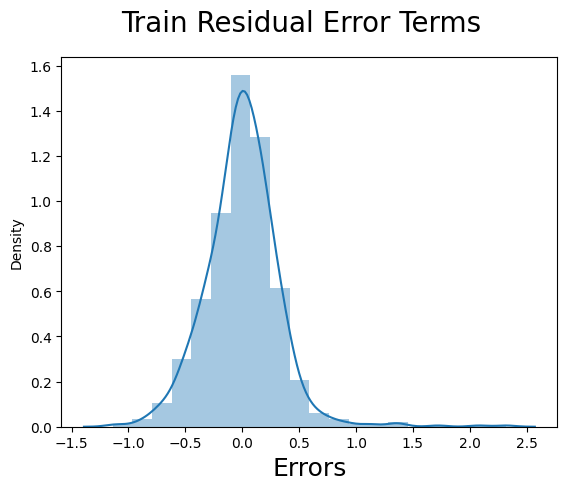

In [56]:
# Plot the histogram of the error terms
res = y_train-y_train_pred
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Train Residual Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)
plt.show()

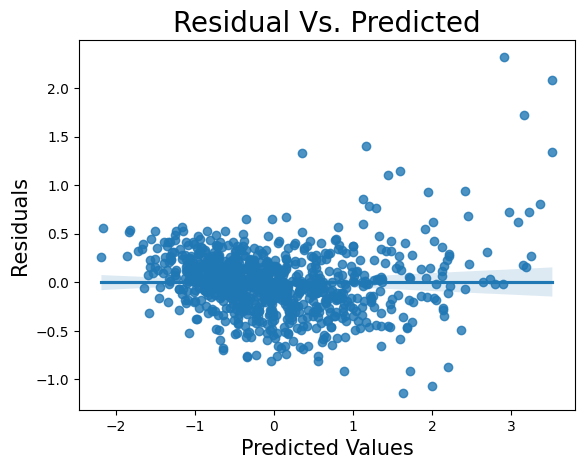

In [57]:
sns.regplot(x=y_train_pred, y=res)
plt.title('Residual Vs. Predicted', fontdict={'fontsize': 20})
plt.xlabel('Predicted Values', fontdict={'fontsize': 15})
plt.ylabel('Residuals', fontdict={'fontsize': 15})
plt.show()

In [58]:
# Predicting on test dataframe
X_test_const = sm.add_constant(X_test)
y_test_pred = lr_model.predict(X_test_const)
r2_score_test = r2_score(y_test,y_test_pred)

In [59]:
print("test r2 score: ", r2_score_test)
print("test mean squared error: ", mean_squared_error(y_test, y_test_pred))

test r2 score:  0.866422556371121
test mean squared error:  0.12391518144978514


**Implmenting Regularization**

**Model 2: Ridge**

In [60]:
# list of alphas for hyperparameter tunning
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 30, 40, 50]}

folds = 10
ridge = Ridge()
model_cv = GridSearchCV(estimator = ridge, param_grid = params, scoring= 'neg_mean_absolute_error', cv = folds, return_train_score=True, verbose = 1)
model_cv.fit(X_train, y_train)

Fitting 10 folds for each of 27 candidates, totalling 270 fits


GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 30,
                                   40, 50]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [61]:
print(model_cv.best_params_)

{'alpha': 0.8}


In [62]:
# Create a DataFrame from the cv_results object
cv_results_ridge = pd.DataFrame(model_cv.cv_results_)
cv_results_ridge = cv_results_ridge.query('param_alpha <= 50')
cv_results_ridge.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.010739,0.004676,0.005774,0.002944,0.0001,{'alpha': 0.0001},-0.207699,-0.236061,-0.296430,-0.248557,...,-0.225374,-0.231929,-0.232161,-0.228475,-0.236034,-0.230020,-0.233857,-0.234225,-0.232586,0.003607
1,0.009285,0.002983,0.003804,0.001428,0.001,{'alpha': 0.001},-0.207689,-0.236044,-0.296421,-0.248552,...,-0.225378,-0.231932,-0.232166,-0.228479,-0.236036,-0.230021,-0.233861,-0.234230,-0.232589,0.003607
2,0.010718,0.003666,0.004231,0.002480,0.01,{'alpha': 0.01},-0.207597,-0.235878,-0.296339,-0.248504,...,-0.225419,-0.231968,-0.232208,-0.228513,-0.236055,-0.230032,-0.233897,-0.234277,-0.232622,0.003605
3,0.012516,0.002452,0.004343,0.002069,0.05,{'alpha': 0.05},-0.207266,-0.235193,-0.295990,-0.248251,...,-0.225587,-0.232112,-0.232380,-0.228653,-0.236137,-0.230086,-0.234045,-0.234484,-0.232770,0.003613
4,0.013778,0.002143,0.004937,0.002019,0.1,{'alpha': 0.1},-0.206919,-0.234439,-0.295588,-0.247878,...,-0.225778,-0.232304,-0.232573,-0.228820,-0.236269,-0.230148,-0.234206,-0.234743,-0.232946,0.003625


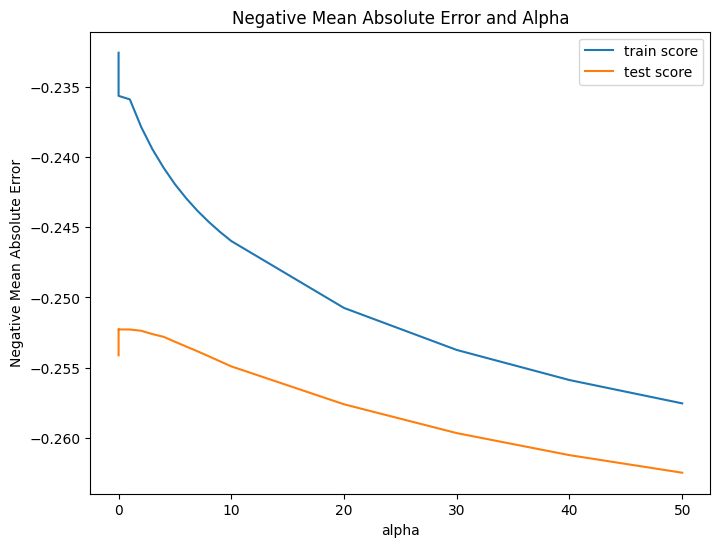

In [63]:
# plotting mean test and train score with alpha
cv_results_ridge['param_alpha'] = cv_results_ridge['param_alpha'].astype('int32')
plt.figure(figsize=(8,6))

plt.plot(cv_results_ridge['param_alpha'], cv_results_ridge['mean_train_score'])
plt.plot(cv_results_ridge['param_alpha'], cv_results_ridge['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and Alpha")
plt.legend(['train score', 'test score'])
plt.show()

**Model 3: Built Ridge Model with the best parameter**

In [65]:
#final ridge model
alpha = 0.8
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)

Ridge(alpha=0.8)

In [66]:
ridge.coef_

array([ 0.28878891,  0.19178003,  0.16999756,  0.        ,  0.343753  ,
        0.        ,  0.02934045,  0.31651589,  0.50827685, -0.23973869,
        0.26764589,  0.60783598,  0.09244175,  0.32478537,  0.24130912,
        0.37991061, -0.12981555, -0.27111203, -0.17665104, -0.19741161,
       -0.00651553, -0.10475792,  0.08143256,  0.04004302,  0.25884754,
       -0.26904967,  0.04327198, -0.06604576, -0.12637912, -0.24889932,
        0.07261243, -0.06604576,  0.40759094,  0.36051316,  0.49893744,
        0.27048634, -0.28590585, -0.06340932, -0.23230636, -0.15107648,
       -0.47453142, -0.25262888, -0.50232593, -0.44526286,  0.24686513,
        0.10892356,  0.38489136,  0.38437835,  0.37935896, -0.22292454])

In [70]:
# Predict and check the R-squared value
y_train_pred = ridge.predict(X_train)
print(round(r2_score(y_true=y_train, y_pred=y_train_pred)*100,2))

89.25


In [71]:
# Predict on test set
y_test_pred = ridge.predict(X_test)
print(round(r2_score(y_true=y_test, y_pred=y_test_pred)*100,2))

87.53


In [73]:
# RMSE on test results
mean_squared_error(y_test, y_test_pred)

0.11564423516726105

**Model 4: Lasso**

In [74]:
#lasso
folds = 10
params = {'alpha': [0.00005, 0.0001, 0.001, 0.008, 0.01, 0.1]}
lasso = Lasso()

# cross validation
lasso_cv = GridSearchCV(estimator = lasso, param_grid = params, scoring= 'neg_mean_absolute_error', cv = folds, return_train_score=True, verbose = 1)
lasso_cv.fit(X_train, y_train)

Fitting 10 folds for each of 6 candidates, totalling 60 fits


GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [5e-05, 0.0001, 0.001, 0.008, 0.01, 0.1]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [75]:
print(lasso_cv.best_params_)

{'alpha': 0.0001}


**Model 5: Building Lasso model with the best parameter**

In [76]:
#final lasso model
alpha = 0.0001
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)

Lasso(alpha=0.0001)

In [77]:
#Predict and check the R-squared value for Train data
y_train_pred = lasso.predict(X_train)
print(round(r2_score(y_true=y_train, y_pred=y_train_pred)*100,2))

89.36


In [78]:
#Predict and check the R-squared value for test data
y_test_pred = lasso.predict(X_test)
print(round(r2_score(y_true=y_test, y_pred=y_test_pred)*100,2))

87.07


In [79]:
# RMSE on test results
mean_squared_error(y_test, y_test_pred)

0.11998907745550617

In [80]:
lasso.coef_

array([ 0.28563096,  0.19108396,  0.17019672,  0.        ,  0.34803159,
        0.        ,  0.        ,  0.32156152,  0.52106891, -0.25254493,
        0.26826412,  0.63539788,  0.0743741 ,  0.44555573,  0.35560616,
        0.60410621, -0.14995572, -0.27103111, -0.17928643, -0.20890422,
       -0.02252585, -0.12877876,  0.06541244,  0.        ,  0.3629983 ,
       -0.2376779 ,  0.        , -0.        , -0.38529449, -0.30438078,
        0.10412052, -0.10147104,  0.89929484,  0.41423767,  0.54392448,
        0.32290549, -0.35922095, -0.12319308, -0.31058701, -0.21678518,
       -0.62106885, -0.27129534, -0.58162777, -0.7703386 ,  0.24112971,
        0.11886847,  0.49762979,  0.49089805,  0.37993314, -0.23339895])

In [81]:
cv_results_lasso = pd.DataFrame(lasso_cv.cv_results_)

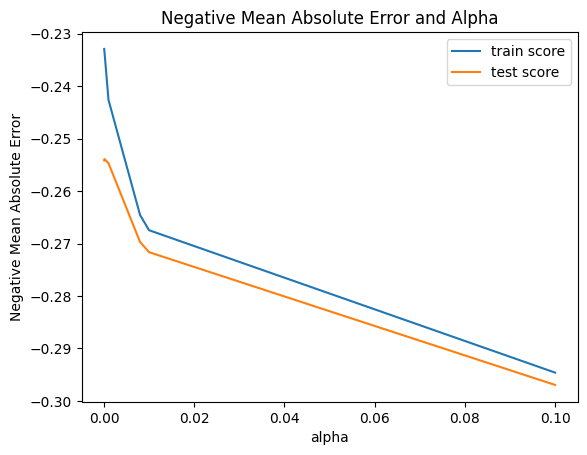

In [86]:
# plotting mean test and train scoes with alpha
cv_results_lasso['param_alpha'] = cv_results_lasso['param_alpha'].astype('float32')
plt.plot(cv_results_lasso['param_alpha'], cv_results_lasso['mean_train_score'])
plt.plot(cv_results_lasso['param_alpha'], cv_results_lasso['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and Alpha")
plt.legend(['train score', 'test score'])
plt.show()

**Best Model Selection & Evaluation**

**Model 3 i.e Ridge model built on best parmeter is doing doing better in R2 Score and also on RSME, I will pick it as my best model**

**Rebulting Model 3(Ridge) to validate the regression assumption & find the top features**

In [90]:
ridge = Ridge(alpha = 0.8)
ridge.fit(X_train,y_train)

y_pred_train = ridge.predict(X_train)
print("Train R2 Score: ", round(r2_score(y_train,y_pred_train)*100,2))

y_pred_test = ridge.predict(X_test)
print("Test R2 Score: ", round(r2_score(y_test,y_pred_test)*100,2))

Train R2 Score:  89.25
Test R2 Score:  87.53


**Building a dataframe to store feature coeffiecint values and sorting the feature in descending order based on its importance**

In [91]:
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = df_train.columns
cols.insert(0,'constant')
ridge_coef_df = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef_df.columns = ['Feature','Coefficient']

In [103]:
top_features_df = ridge_coef_df.sort_values(by='Coefficient',ascending=False)

In [104]:
top_features_df

,Feature,Coefficient
12,BsmtCond,0.607836
9,ExterQual,0.508277
35,GarageQual,0.498937
33,GarageCars,0.407591
47,MSZoning_RL,0.384891
48,MSZoning_RM,0.384378
16,BsmtFinType2,0.379911
49,LandContour_HLS,0.379359
34,GarageArea,0.360513
5,OverallCond,0.343753


**Model Evaluation**

In [402]:
ridge_pred = ridge.predict(X_test)

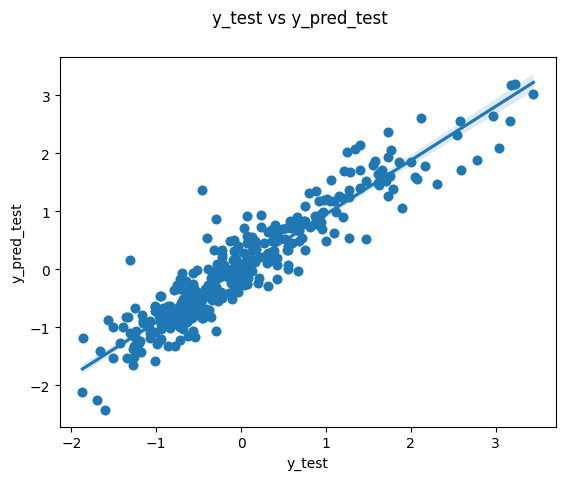

In [100]:
# Plotting y_test and y_pred_test to understand the spread for ridge regression.
fig = plt.figure(dpi=100)
plt.scatter(y_test,y_pred_test)
sns.regplot(x=y_test, y=y_pred_test)
fig.suptitle('y_test vs y_pred_test')
plt.xlabel('y_test')
plt.ylabel('y_pred_test')
plt.show()

**Distribution of error term**

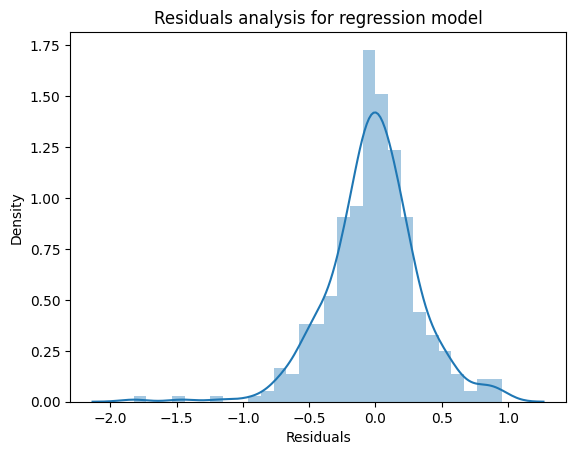

In [102]:
y_res=y_test-y_pred_test
sns.distplot(y_res,kde=True)
plt.title('Residuals analysis for regression model')
plt.xlabel("Residuals")
plt.show()

# **Conclusion**

**Below are some important metrics value for ridge and lasso regression :**

**Ridge**
1.   Best alpha value: 0.8
2.   r2 score on train = 89.25
3.   r2 score on test = 87.53
4.   Root Mean Square Error Value on Test = 0.115644


**Lasso**
1.   Best alpha value: 0.0001
2.   r2 score on train = 89.36
3.   r2 score on test = 87.07
4.   Root Mean Square Error value on Test = 0.119989



**Picking top 15 features based on its coefficient value provided by best model
 (Ridge)**

In [105]:
top_features_df.head(15)

,Feature,Coefficient
12,BsmtCond,0.607836
9,ExterQual,0.508277
35,GarageQual,0.498937
33,GarageCars,0.407591
47,MSZoning_RL,0.384891
48,MSZoning_RM,0.384378
16,BsmtFinType2,0.379911
49,LandContour_HLS,0.379359
34,GarageArea,0.360513
5,OverallCond,0.343753
